In [1]:
#!/usr/bin/python
import spidev
#import RPi.GPIO as GPIO
import time

import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import glob, os
from scipy import signal as ssignal
%matplotlib inline


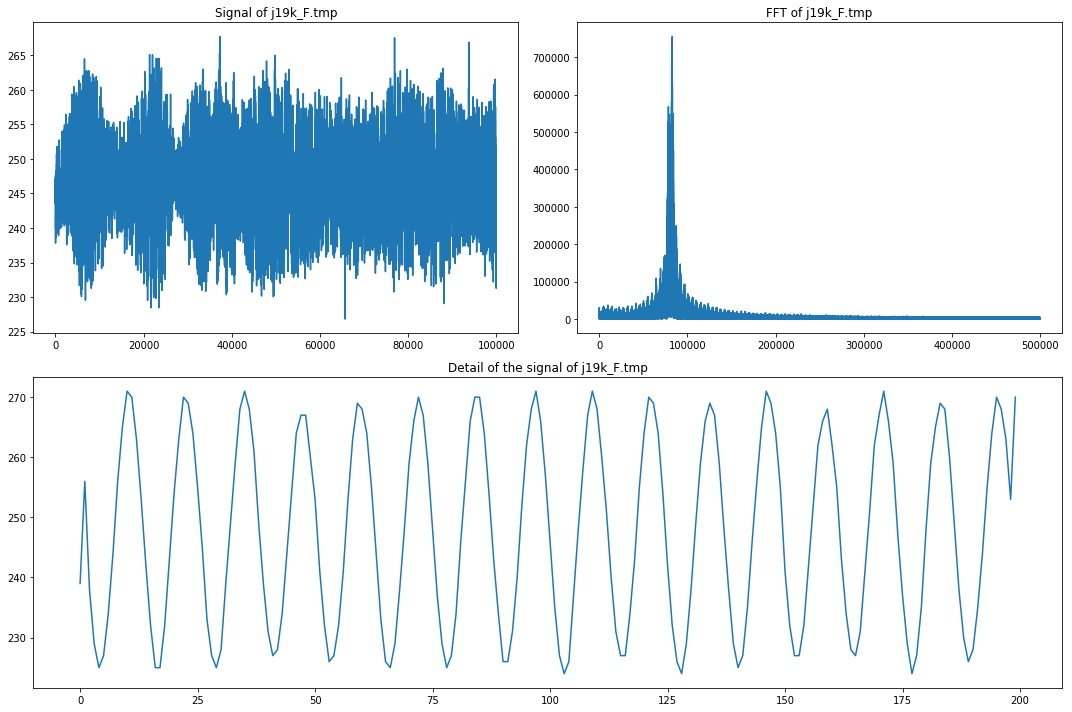

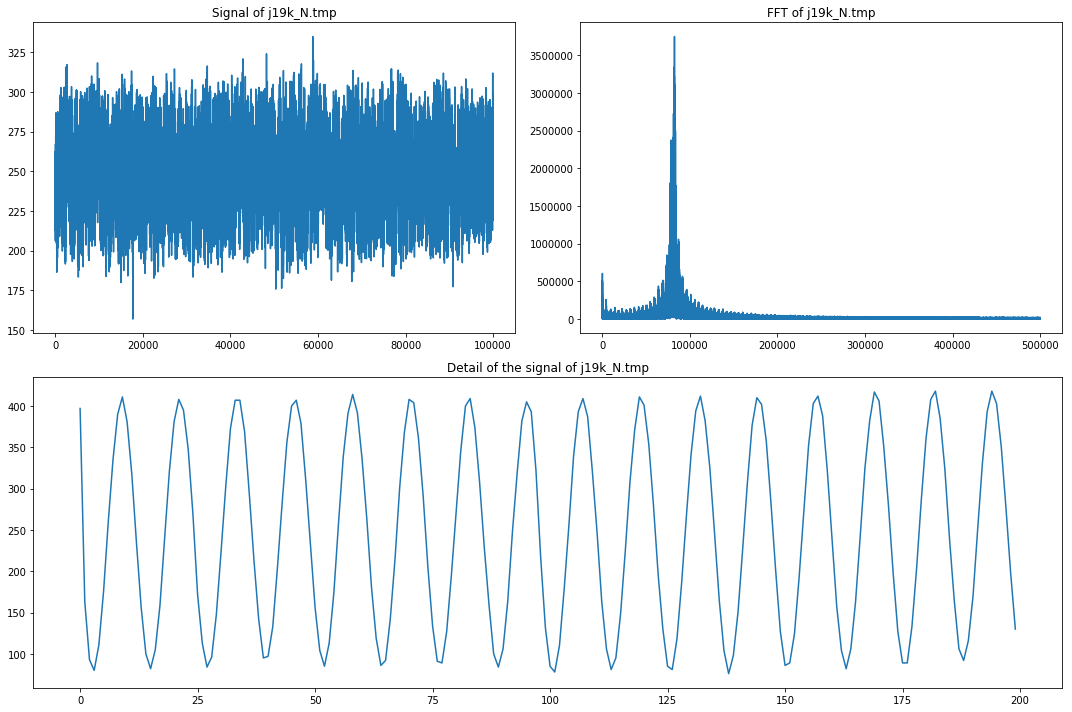

In [54]:
os.chdir("./")
for tmpfile in glob.glob("j19*.tmp"):
    
    FILE = tmpfile
    with open(FILE) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content] 


    A = []
    for item in content:
        if len(item) < 7:
            resp = item.split(" ")
            A.append( 256*(int(resp[0])/8) + int(resp[1]) )
  
    fig = plt.figure(figsize=(15, 10))

    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax3 = plt.subplot2grid((2, 2), (1,0), colspan=2)


    ax1.plot(ssignal.decimate(A,10)[1:])
    ax1.set_title("Signal of "+tmpfile)
    ax3.plot(A[0:len(A)/5000])
    ax3.set_title("Detail of the signal of "+tmpfile)
    
    F = np.abs(np.fft.fft(A))
    ax2.plot(F[100:len(A)/2-1])
    ax2.set_title("FFT of "+tmpfile)

    plt.tight_layout()
    
    plt.savefig(tmpfile+"details.jpg")
    plt.show()

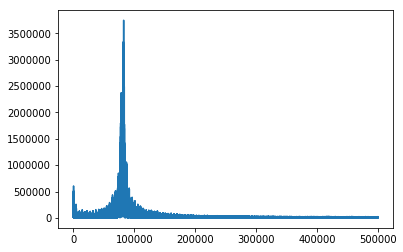

In [55]:
plt.plot(F[1:len(F)/2-1])
plt.show()

In [56]:
ax_idx = 3000+np.argmax(F[3000:100000])
print ax_idx

82519


In [57]:
T = len(F)
scale = float(19000.0/ax_idx)
print scale

0.23025000303


In [58]:
t = [ k*scale   for k in range(T)]

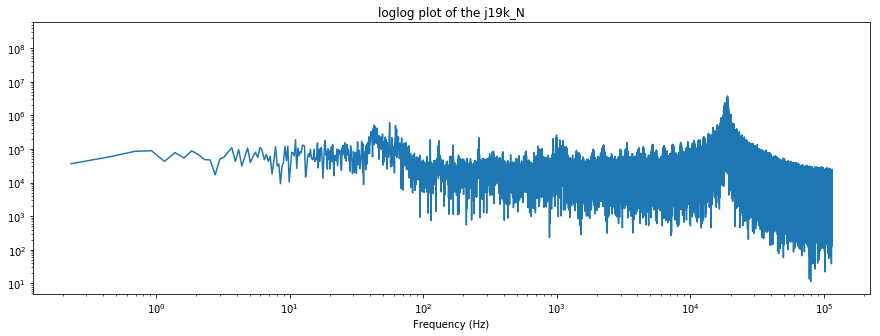

In [59]:
plt.figure(figsize=(15,5))
plt.title("loglog plot of the "+FILE.split(".")[0])
plt.loglog(t[0:len(F)/2-1],F[0:len(F)/2-1])
plt.xlabel("Frequency (Hz)")
plt.savefig(FILE.split(".")[0]+'_loglog.png')
plt.show()

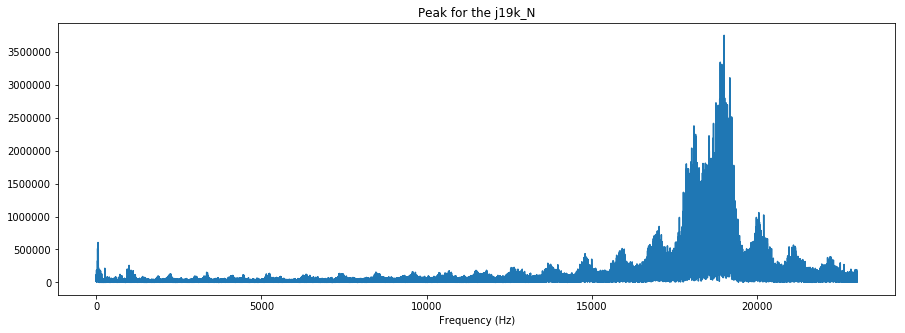

In [61]:
plt.figure(figsize=(15,5))
plt.plot(t[5:100000],F[5:100000])
plt.title("Peak for the "+FILE.split(".")[0])
plt.xlabel("Frequency (Hz)")
plt.savefig(FILE.split(".")[0]+'_detail.png')
plt.show()